In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt

def read_json_file(file_path, numThread = 10):
    """Reads a JSON file and returns its contents as a Python object.

    Args:
        file_path (str): The path to the JSON file.

    Returns:
        object: The Python dictionary or list that was decoded from JSON.
    """
    try:
        with open(file_path, 'r') as file:
            data = json.load(file)  # Read the JSON data into a Python object
            for row in data:
                row["numThread"] = numThread
            return data
    except FileNotFoundError:
        print(f"Error: The file {file_path} does not exist.")
        return None
    except json.JSONDecodeError:
        print(f"Error: The file {file_path} is not a valid JSON file.")
        return None
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

# Example usage:

data1 = read_json_file('thread10.json', 10)
data2 = read_json_file('thread100.json', 100)
data3 = read_json_file('thread1000.json', 1000)
data4 = read_json_file('thread10000.json', 10000)
# combine all data
data = data1 + data2 + data3 + data4
df = pd.DataFrame(data)
df = df.groupby(['num_requests', 'numThread']).mean().reset_index()

df.head()

,num_requests,numThread,200_ok_responses,average_response_time_ms,throughput_requests_per_second,average_payload_kb
0,10,10,10.0,2.793210,1685.98750,1.533201
1,10,100,10.0,2.846060,1442.64525,1.596192
2,10,1000,10.0,2.984573,1398.17250,1.146654
3,10,10000,10.0,2.419268,1684.16250,1.262576
4,100,10,100.0,53.344927,3115.89365,1.407265


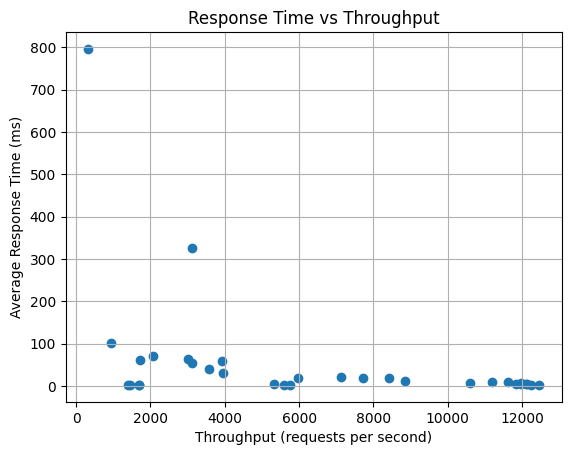

In [2]:
# Assuming 'df' is your DataFrame
plt.scatter(df['throughput_requests_per_second'], df['average_response_time_ms'])
plt.title('Response Time vs Throughput')
plt.ylabel('Average Response Time (ms)')
plt.xlabel('Throughput (requests per second)')
plt.grid(True)
plt.show()

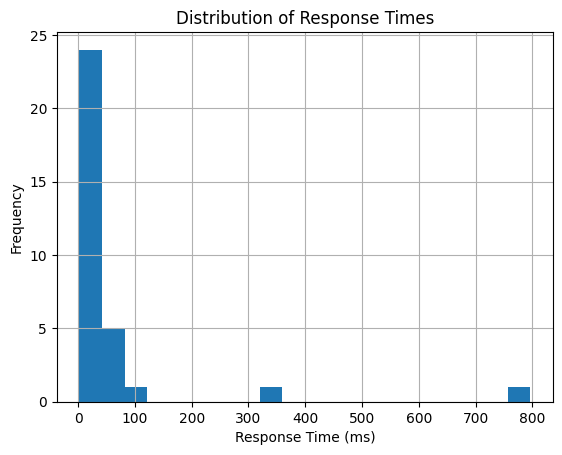

In [3]:
df['average_response_time_ms'].hist(bins=20)
plt.title('Distribution of Response Times')
plt.xlabel('Response Time (ms)')
plt.ylabel('Frequency')
plt.show()


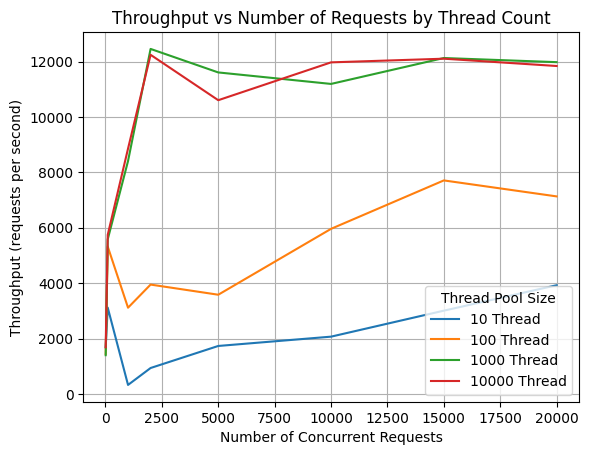

In [4]:
# Plotting
fig, ax = plt.subplots()

# Group by 'numThread' and plot each group
for name, group in df.groupby('numThread'):
    group.plot(x='num_requests', y='throughput_requests_per_second', ax=ax, label=f'{name} Thread')

plt.title('Throughput vs Number of Requests by Thread Count')
plt.xlabel('Number of Concurrent Requests')
plt.ylabel('Throughput (requests per second)')
plt.grid(True)
plt.legend(title='Thread Pool Size')
plt.show()

In [5]:
data = read_json_file("load-balancing.json")
df = pd.DataFrame(data)
df = df.groupby(['num_requests', 'numThread']).mean().reset_index()
df.head()

,num_requests,numThread,200_ok_responses,average_response_time_ms,throughput_requests_per_second,average_payload_kb
0,10,10,10.0,1.103063,3298.53225,2.886328
1,100,10,100.0,4.155175,5554.76500,3.109542
2,1000,10,1000.0,26.951675,6127.26250,3.094080
3,2000,10,2000.0,19.315025,6641.50500,3.099277
4,5000,10,5000.0,20.103075,6800.99250,3.105853


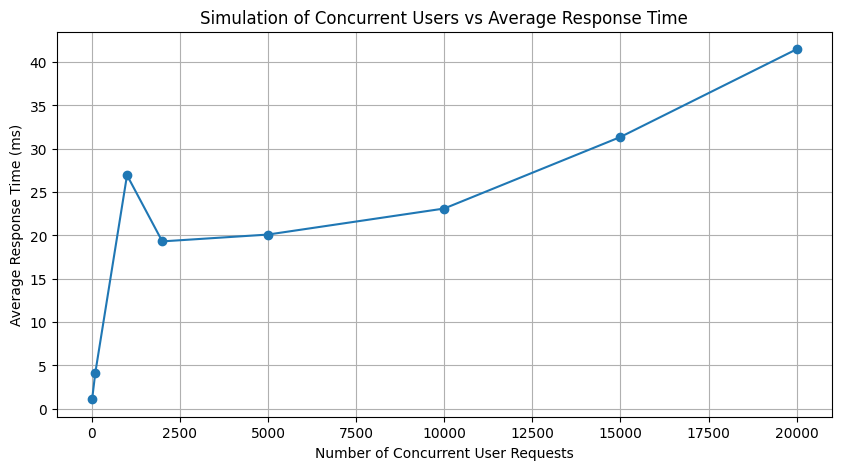

In [8]:
filtered_df = df[df['numThread'] == 10]

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(filtered_df['num_requests'], filtered_df['average_response_time_ms'], marker='o')
plt.title('Simulation of Concurrent Users vs Average Response Time')
plt.xlabel('Number of Concurrent User Requests')
plt.ylabel('Average Response Time (ms)')
plt.grid(True)
plt.show()